In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


# **Load datasets** 

In [2]:
bb=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv")

In [3]:
bt=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv")

In [4]:
bv=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")

In [5]:
cb=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv")

In [6]:
ct=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv")

In [7]:
di=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv")

In [8]:
mr=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv")

In [9]:
sample=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv")

# **Overview**

In [10]:
bb

,book_theater_id,show_datetime,booking_datetime,tickets_booked
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5
...,...,...,...,...
68331,book_00523,2024-02-28 23:00:00,2024-02-27 19:00:00,7
68332,book_00073,2024-02-28 23:00:00,2024-02-19 07:00:00,6
68333,book_00456,2024-02-28 23:00:00,2024-02-28 22:00:00,2
68334,book_00388,2024-02-28 23:00:00,2024-02-23 16:00:00,8


In [11]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68336 entries, 0 to 68335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_theater_id   68336 non-null  object
 1   show_datetime     68336 non-null  object
 2   booking_datetime  68336 non-null  object
 3   tickets_booked    68336 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [12]:
bb.isnull().sum()

book_theater_id     0
show_datetime       0
booking_datetime    0
tickets_booked      0
dtype: int64

In [13]:
bt

,book_theater_id,theater_type,theater_area,latitude,longitude
0,book_00093,Drama,Area_001,22.619233,78.113017
1,book_00078,Drama,Area_001,22.619233,78.113017
2,book_00291,Drama,Area_001,22.619233,78.113017
3,book_00258,Drama,Area_001,22.619233,78.113017
4,book_00212,Drama,Area_002,23.004410,79.934515
...,...,...,...,...,...
824,NaN,Drama,Area_006,23.005894,79.915496
825,NaN,Action,Area_006,23.005894,79.915496
826,book_00305,Action,Area_006,23.005894,79.915496
827,book_00216,Comedy,Area_016,25.963367,80.570258


In [14]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_theater_id  314 non-null    object 
 1   theater_type     829 non-null    object 
 2   theater_area     829 non-null    object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [15]:
bt.isnull().sum()

book_theater_id    515
theater_type         0
theater_area         0
latitude             0
longitude            0
dtype: int64

In [16]:
bv

,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58
3,book_00001,2023-01-16,44
4,book_00001,2023-01-18,12
...,...,...,...
214041,book_00829,2024-02-23,16
214042,book_00829,2024-02-24,8
214043,book_00829,2024-02-25,16
214044,book_00829,2024-02-27,16


In [17]:
bv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214046 non-null  object
 1   show_date        214046 non-null  object
 2   audience_count   214046 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [18]:
bv.isnull().sum()

book_theater_id    0
show_date          0
audience_count     0
dtype: int64

In [19]:
cb

,cine_theater_id,show_datetime,booking_datetime,tickets_sold
0,cinePOS_00001,2023-01-01 11:00:00,2023-01-01 09:00:00,1
1,cinePOS_00002,2023-01-01 13:00:00,2023-01-01 06:00:00,3
2,cinePOS_00003,2023-01-01 16:00:00,2023-01-01 14:00:00,2
3,cinePOS_00004,2023-01-01 17:00:00,2023-01-01 11:00:00,5
4,cinePOS_00005,2023-01-01 17:00:00,2023-01-01 03:00:00,13
...,...,...,...,...
1641961,cinePOS_02502,2024-02-28 23:00:00,2024-02-28 09:00:00,2
1641962,cinePOS_12483,2024-02-28 23:00:00,2024-02-24 16:00:00,7
1641963,cinePOS_00334,2024-02-28 23:00:00,2024-01-26 18:00:00,1
1641964,cinePOS_06176,2024-02-28 23:00:00,2024-02-21 00:00:00,11


In [20]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641966 entries, 0 to 1641965
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   cine_theater_id   1641966 non-null  object
 1   show_datetime     1641966 non-null  object
 2   booking_datetime  1641966 non-null  object
 3   tickets_sold      1641966 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 50.1+ MB


In [21]:
cb.isnull().sum()

cine_theater_id     0
show_datetime       0
booking_datetime    0
tickets_sold        0
dtype: int64

In [22]:
ct

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cine_theater_id,theater_type,theater_area,latitude,longitude
0,cinePOS_05466,Other,Area_104,22.619233,78.113017
1,cinePOS_08708,Other,Area_104,22.619233,78.113017
2,cinePOS_00753,Other,Area_104,22.619233,78.113017
3,cinePOS_05776,Other,Area_104,22.619233,78.113017
4,cinePOS_07536,Other,Area_104,23.004410,79.934515
...,...,...,...,...,...
4685,cinePOS_08203,Other,Area_131,NaN,NaN
4686,cinePOS_04068,Other,Area_100,NaN,NaN
4687,cinePOS_03885,Other,Area_131,NaN,NaN
4688,cinePOS_04204,Other,Area_133,NaN,NaN


In [23]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cine_theater_id  4690 non-null   object 
 1   theater_type     4690 non-null   object 
 2   theater_area     4690 non-null   object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [24]:
ct.isnull().sum()

cine_theater_id       0
theater_type          0
theater_area          0
latitude           3861
longitude          3861
dtype: int64

In [25]:
di

,show_date,day_of_week
0,2023-01-01,Sunday
1,2023-01-02,Monday
2,2023-01-03,Tuesday
3,2023-01-04,Wednesday
4,2023-01-05,Thursday
...,...,...
542,2024-06-26,Wednesday
543,2024-06-27,Thursday
544,2024-06-28,Friday
545,2024-06-29,Saturday


In [26]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_date    547 non-null    object
 1   day_of_week  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


In [27]:
di.isnull().sum()

show_date      0
day_of_week    0
dtype: int64

In [28]:
mr

,book_theater_id,cine_theater_id
0,book_00509,cinePOS_01261
1,book_00063,cinePOS_02467
2,book_00054,cinePOS_08923
3,book_00094,cinePOS_02479
4,book_00052,cinePOS_06750
...,...,...
145,book_00363,cinePOS_09012
146,book_00042,cinePOS_02789
147,book_00746,cinePOS_09057
148,book_00625,cinePOS_05648


In [29]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book_theater_id  150 non-null    object
 1   cine_theater_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [30]:
mr.isnull().sum()

book_theater_id    0
cine_theater_id    0
dtype: int64

In [31]:
sample

,ID,audience_count
0,book_00001_2024-03-01,0
1,book_00001_2024-03-02,0
2,book_00001_2024-03-03,0
3,book_00001_2024-03-04,0
4,book_00001_2024-03-06,0
...,...,...
38057,book_00829_2024-04-18,0
38058,book_00829_2024-04-19,0
38059,book_00829_2024-04-20,0
38060,book_00829_2024-04-21,0


In [253]:
sam=sample.copy()

# **Exploratory Data Analysis**

In [32]:
bb.describe().T

,count,mean,std,min,25%,50%,75%,max
tickets_booked,68336.0,4.425808,4.808945,1.0,2.0,3.0,5.0,100.0


In [33]:
bt.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,829.0,23.0,0.833863,22.025970,22.619233,23.004410,23.018784,26.349436
longitude,829.0,79.0,1.460388,76.112098,78.170501,79.908065,79.934515,81.743235


In [251]:
theatre_mean_bb = bb.groupby("book_theater_id")["tickets_booked"].mean().reset_index()

In [34]:
cb.describe().T

,count,mean,std,min,25%,50%,75%,max
tickets_sold,1641966.0,4.987345,5.234901,1.0,2.0,3.0,6.0,100.0


In [248]:
theatre_mean = bv.groupby("book_theater_id")["audience_count"].mean().reset_index()

In [35]:
ct.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,829.0,23.0,0.833863,22.025970,22.619233,23.004410,23.018784,26.349436
longitude,829.0,79.0,1.460388,76.112098,78.170501,79.908065,79.934515,81.743235


In [247]:
bv.describe().T

,count,mean,min,25%,50%,75%,max,std
show_date,214046,2023-09-13 04:07:24.285807360,2023-01-01 00:00:00,2023-07-09 00:00:00,2023-09-25 00:00:00,2023-12-11 00:00:00,2024-02-28 00:00:00,NaN
audience_count,214046.0,41.616568,2.0,18.0,34.0,58.0,1350.0,32.834918


In [36]:
di.describe().T

,count,unique,top,freq
show_date,547,547,2023-01-01,1
day_of_week,547,7,Sunday,79


In [257]:
gm = bv["audience_count"].mean()

In [258]:
gmb=bb["tickets_booked"].mean()

In [37]:
di

,show_date,day_of_week
0,2023-01-01,Sunday
1,2023-01-02,Monday
2,2023-01-03,Tuesday
3,2023-01-04,Wednesday
4,2023-01-05,Thursday
...,...,...
542,2024-06-26,Wednesday
543,2024-06-27,Thursday
544,2024-06-28,Friday
545,2024-06-29,Saturday


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


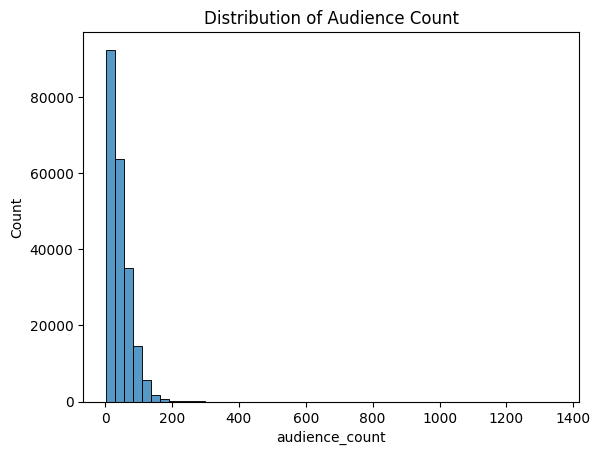

In [39]:
sns.histplot(bv["audience_count"], bins=50)
plt.title("Distribution of Audience Count")
plt.show()

In [40]:
bv["book_theater_id"].value_counts()

book_theater_id
book_00528    424
book_00597    424
book_00676    423
book_00703    423
book_00580    422
             ... 
book_00505     24
book_00581     18
book_00265     16
book_00524      2
book_00105      1
Name: count, Length: 826, dtype: int64

In [41]:
bb["book_theater_id"].value_counts()

book_theater_id
book_00712    1832
book_00082    1562
book_00102    1287
book_00105    1223
book_00376    1160
              ... 
book_00757       1
book_00206       1
book_00317       1
book_00124       1
book_00268       1
Name: count, Length: 301, dtype: int64

In [42]:
bt["book_theater_id"].value_counts()

book_theater_id
book_00093    1
book_00187    1
book_00242    1
book_00177    1
book_00059    1
             ..
book_00164    1
book_00225    1
book_00047    1
book_00231    1
book_00216    1
Name: count, Length: 314, dtype: int64

In [43]:
s1=set(bv["book_theater_id"].unique()).intersection(set(bt["book_theater_id"].unique()))

In [44]:
len(s1)

313

In [45]:
s2=set(bv["book_theater_id"]).intersection(set(bb["book_theater_id"]))

In [46]:
len(s2)

298

In [47]:
s3=set(bt["book_theater_id"]).intersection(set(bb["book_theater_id"]))

In [254]:
sam["book_theater_id"]=sam["ID"].str.extract(r"(book_\d+)")

In [255]:
lsb=set(bt["book_theater_id"]).intersection(set(sam["book_theater_id"]))

In [48]:
len(s3)

148

In [49]:
cb["cine_theater_id"].value_counts()

cine_theater_id
cinePOS_03019    921
cinePOS_05965    679
cinePOS_10811    669
cinePOS_03773    647
cinePOS_05725    646
                ... 
cinePOS_13133      1
cinePOS_13134      1
cinePOS_13136      1
cinePOS_13137      1
cinePOS_13161      1
Name: count, Length: 13161, dtype: int64

In [50]:
ct["cine_theater_id"].value_counts()

cine_theater_id
cinePOS_05466    1
cinePOS_12739    1
cinePOS_05443    1
cinePOS_13124    1
cinePOS_05340    1
                ..
cinePOS_01932    1
cinePOS_00041    1
cinePOS_08283    1
cinePOS_05347    1
cinePOS_00501    1
Name: count, Length: 4690, dtype: int64

In [51]:
s4=set(ct["cine_theater_id"]).intersection(set(cb["cine_theater_id"]))

In [52]:
len(s4)

4547

In [53]:
bt[["latitude",	"longitude"]].corr()

,latitude,longitude
latitude,1.000000,0.644706
longitude,0.644706,1.000000


In [54]:
ct[["latitude",	"longitude"]].corr()

,latitude,longitude
latitude,1.000000,0.644706
longitude,0.644706,1.000000


In [55]:
bt["theater_area_num"] = bt["theater_area"].str.extract(r"(\d+)")

In [56]:
bt.groupby("theater_type")["theater_area_num"].value_counts().unstack().fillna(0)

theater_area_num,001,002,003,004,005,006,007,008,009,010,...,094,095,096,097,098,099,100,101,102,103
theater_type,,,,,,,,,,,,,,,,,,,,,
Action,4.0,3.0,3.0,0.0,4.0,6.0,0.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,2.0,3.0,28.0,12.0,6.0,11.0,8.0,0.0,0.0,6.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,4.0,20.0,12.0,7.0,2.0,17.0,7.0,5.0,6.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Other,7.0,25.0,21.0,11.0,13.0,24.0,6.0,15.0,6.0,23.0,...,2.0,2.0,2.0,4.0,2.0,2.0,2.0,0.0,2.0,2.0


In [57]:
btn=bt[bt["book_theater_id"].isna()]

In [58]:
bta=bt.dropna()

In [59]:
bta.groupby("theater_type")["theater_area_num"].value_counts().unstack().fillna(0)

theater_area_num,001,002,003,004,005,006,007,008,009,010,...,089,090,092,094,095,096,097,098,101,102
theater_type,,,,,,,,,,,,,,,,,,,,,
Action,3.0,2.0,2.0,0.0,2.0,2.0,0.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,1.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,4.0,10.0,6.0,2.0,2.0,11.0,1.0,3.0,3.0,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Other,3.0,3.0,5.0,1.0,7.0,8.0,1.0,11.0,2.0,9.0,...,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0


In [60]:
btn.groupby("theater_type")["theater_area_num"].value_counts().unstack().fillna(0)

theater_area_num,001,002,003,004,005,006,007,008,009,010,...,093,095,096,097,098,099,100,101,102,103
theater_type,,,,,,,,,,,,,,,,,,,,,
Action,1.0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,1.0,3.0,23.0,11.0,5.0,10.0,7.0,0.0,0.0,5.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,0.0,10.0,6.0,5.0,0.0,6.0,6.0,2.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Other,4.0,22.0,16.0,10.0,6.0,16.0,5.0,4.0,4.0,14.0,...,2.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0,2.0


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

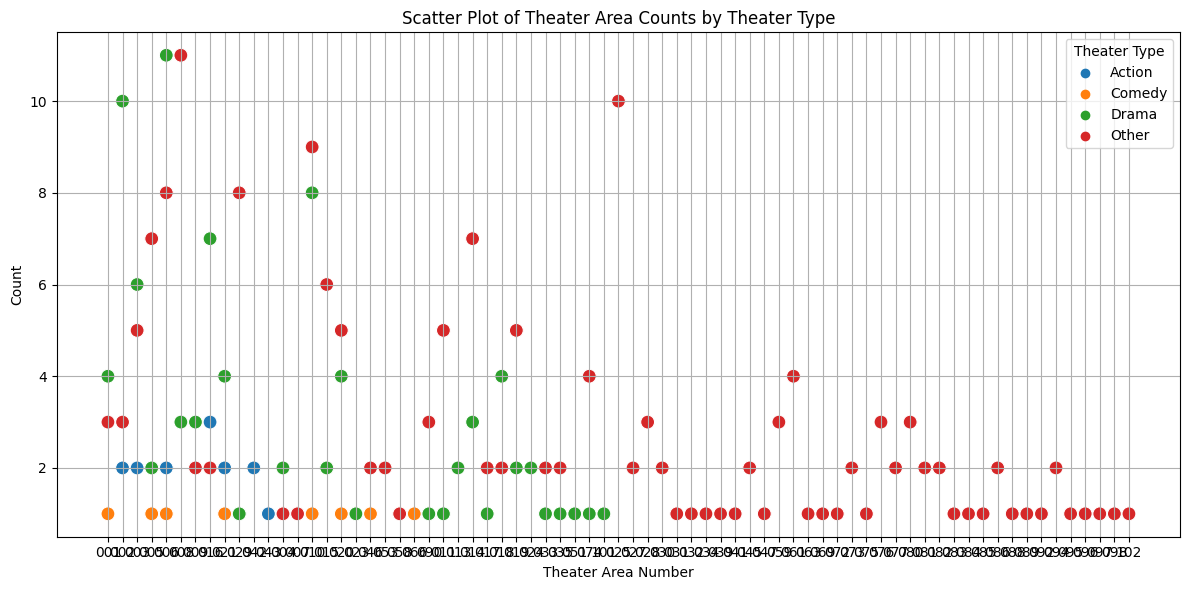

In [62]:
grouped = bta.groupby(["theater_type", "theater_area_num"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x="theater_area_num", y="count", hue="theater_type", s=100)

plt.xlabel("Theater Area Number")
plt.ylabel("Count")
plt.title("Scatter Plot of Theater Area Counts by Theater Type")
plt.legend(title="Theater Type")
plt.grid(True)
plt.tight_layout()
plt.show()

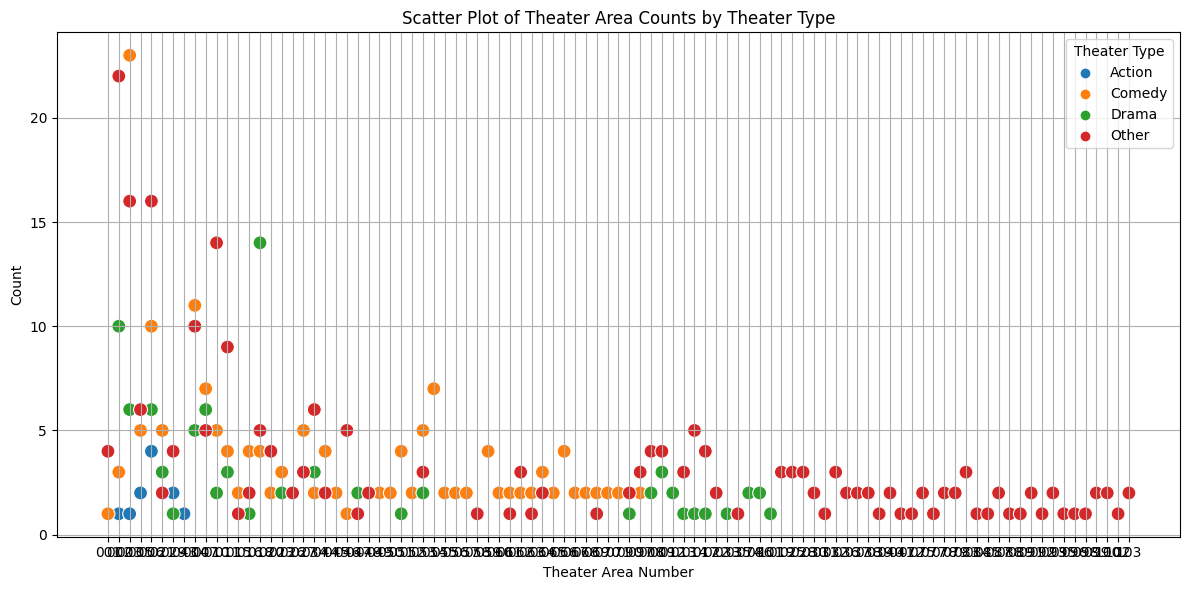

In [63]:
grouped = btn.groupby(["theater_type", "theater_area_num"]).size().reset_index(name="count")


plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x="theater_area_num", y="count", hue="theater_type", s=100)

plt.xlabel("Theater Area Number")
plt.ylabel("Count")
plt.title("Scatter Plot of Theater Area Counts by Theater Type")
plt.legend(title="Theater Type")
plt.grid(True)
plt.tight_layout()
plt.show()

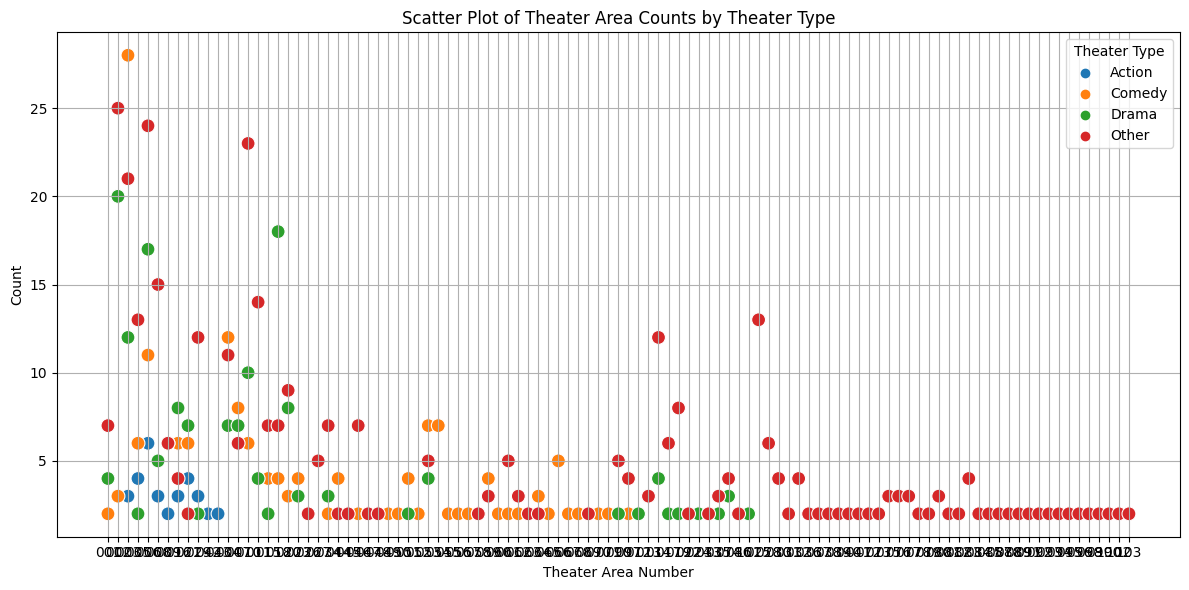

In [64]:
grouped = bt.groupby(["theater_type", "theater_area_num"]).size().reset_index(name="count")


plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x="theater_area_num", y="count", hue="theater_type", s=100)

plt.xlabel("Theater Area Number")
plt.ylabel("Count")
plt.title("Scatter Plot of Theater Area Counts by Theater Type")
plt.legend(title="Theater Type")
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
ct["theater_area_num"] = ct["theater_area"].str.extract(r"(\d+)")

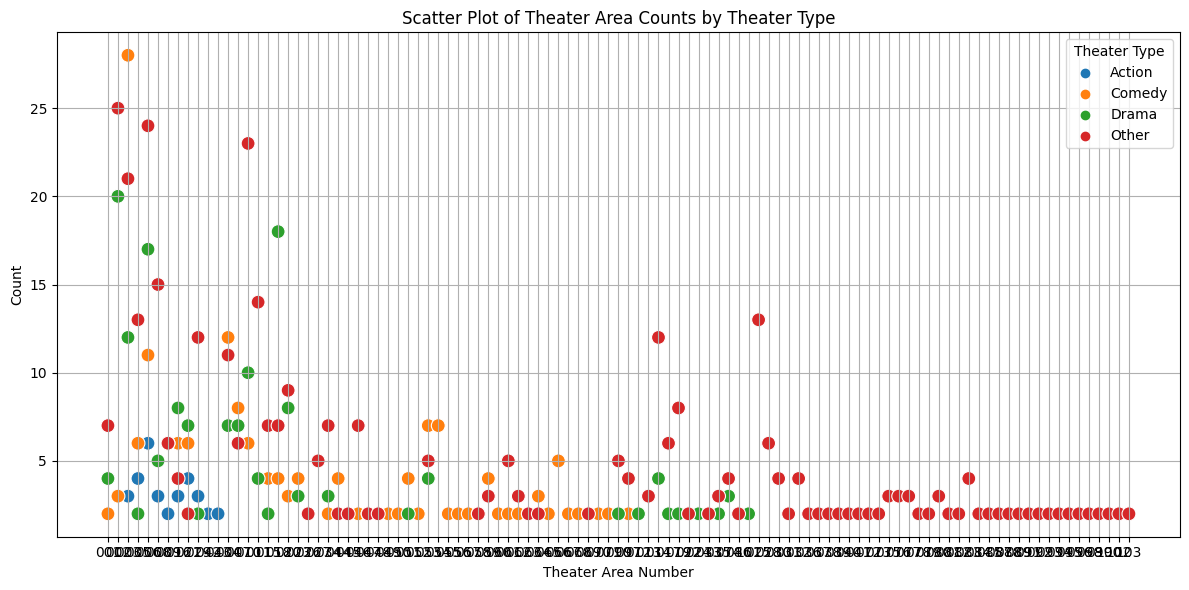

In [66]:
grouped = bt.groupby(["theater_type", "theater_area_num"]).size().reset_index(name="count")


plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x="theater_area_num", y="count", hue="theater_type", s=100)

plt.xlabel("Theater Area Number")
plt.ylabel("Count")
plt.title("Scatter Plot of Theater Area Counts by Theater Type")
plt.legend(title="Theater Type")
plt.grid(True)
plt.tight_layout()
plt.show()

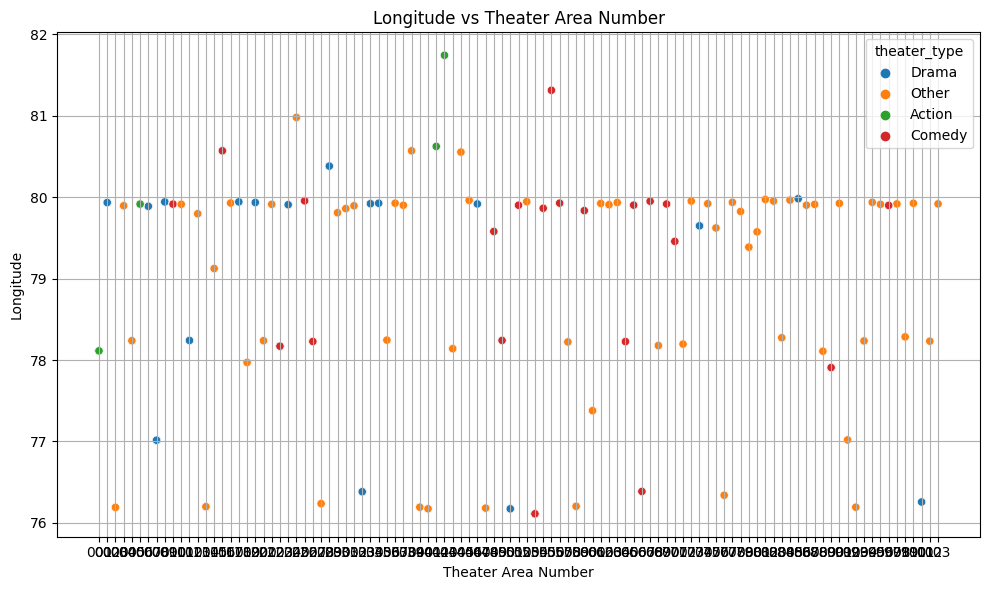

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=bt, x="theater_area_num", y="longitude", hue="theater_type")
plt.xlabel("Theater Area Number")
plt.ylabel("Longitude")
plt.title("Longitude vs Theater Area Number")
plt.grid(True)
plt.tight_layout()
plt.show()


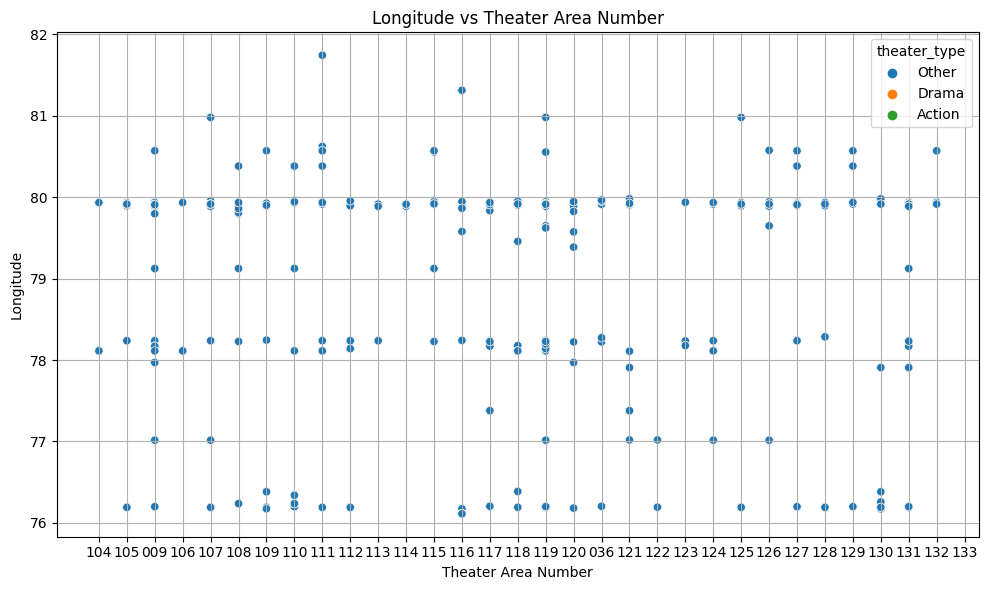

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ct, x="theater_area_num", y="longitude", hue="theater_type")
plt.xlabel("Theater Area Number")
plt.ylabel("Longitude")
plt.title("Longitude vs Theater Area Number")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='theater_area_num', ylabel='latitude'>

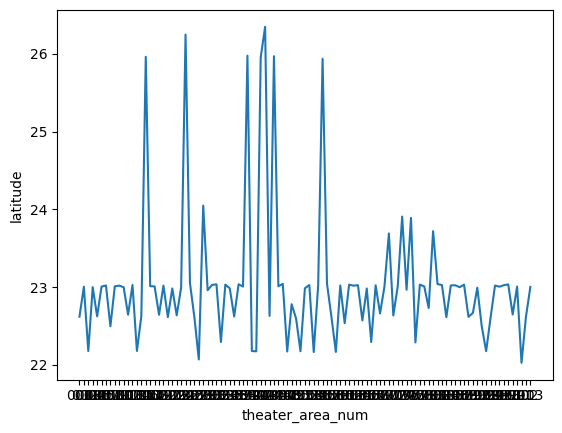

In [69]:
bt_sorted = bt.groupby("theater_area_num")["latitude"].mean().reset_index()
sns.lineplot(data=bt_sorted, x="theater_area_num", y="latitude")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='theater_area_num', ylabel='latitude'>

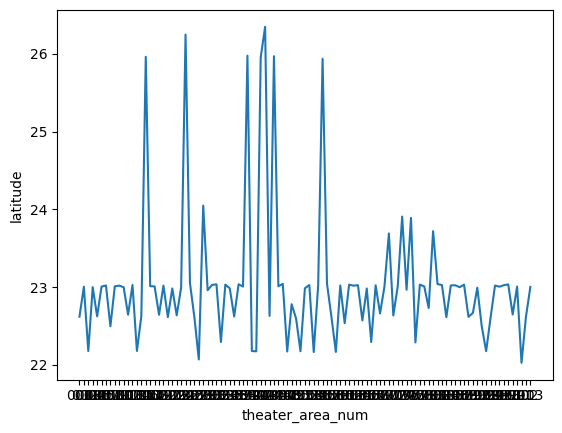

In [70]:
ct_sorted = ct.groupby("theater_area_num")["latitude"].mean().reset_index()
sns.lineplot(data=bt_sorted, x="theater_area_num", y="latitude")


# **Data preprocessing & feature engineering**

In [71]:
bb['show_datetime'] = pd.to_datetime(bb['show_datetime'])

In [72]:
bv['show_date'] = pd.to_datetime(bv['show_date'])

In [73]:
di['show_date'] = pd.to_datetime(di['show_date'])

In [74]:
cb['show_datetime'] = pd.to_datetime(cb['show_datetime'])

In [75]:
bb['show_date'] = bb['show_datetime'].dt.date
bb['show_date'] = pd.to_datetime(bb['show_date'])

In [76]:
daily_bb = (
    bb.groupby(['book_theater_id', 'show_date'])['tickets_booked']
      .sum()
      .reset_index())

In [77]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68336 entries, 0 to 68335
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   book_theater_id   68336 non-null  object        
 1   show_datetime     68336 non-null  datetime64[ns]
 2   booking_datetime  68336 non-null  object        
 3   tickets_booked    68336 non-null  int64         
 4   show_date         68336 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 2.6+ MB


In [78]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641966 entries, 0 to 1641965
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   cine_theater_id   1641966 non-null  object        
 1   show_datetime     1641966 non-null  datetime64[ns]
 2   booking_datetime  1641966 non-null  object        
 3   tickets_sold      1641966 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 50.1+ MB


In [79]:
bv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   book_theater_id  214046 non-null  object        
 1   show_date        214046 non-null  datetime64[ns]
 2   audience_count   214046 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.9+ MB


In [80]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   show_date    547 non-null    datetime64[ns]
 1   day_of_week  547 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 8.7+ KB


In [261]:
sam=sam.drop(columns=["audience_count","show_date"])

In [263]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38062 entries, 0 to 38061
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               38062 non-null  object        
 1   audience_count   38062 non-null  int64         
 2   book_theater_id  38062 non-null  object        
 3   show_date        38062 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [266]:
btv=pd.merge(bt,bv,on="book_theater_id",how="left")

In [267]:
btv

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_theater_id,theater_type,theater_area,latitude,longitude,show_date,audience_count
0,book_00093,Drama,Area_001,22.619233,78.113017,2023-01-02,192.0
1,book_00093,Drama,Area_001,22.619233,78.113017,2023-01-03,120.0
2,book_00093,Drama,Area_001,22.619233,78.113017,2023-01-04,96.0
3,book_00093,Drama,Area_001,22.619233,78.113017,2023-01-05,112.0
4,book_00093,Drama,Area_001,22.619233,78.113017,2023-01-06,52.0
...,...,...,...,...,...,...,...
80661,book_00216,Comedy,Area_016,25.963367,80.570258,2024-02-25,8.0
80662,book_00216,Comedy,Area_016,25.963367,80.570258,2024-02-26,6.0
80663,book_00216,Comedy,Area_016,25.963367,80.570258,2024-02-27,8.0
80664,book_00216,Comedy,Area_016,25.963367,80.570258,2024-02-28,8.0


In [268]:
bbv=pd.merge(bb,bv,on="book_theater_id",how="left")

In [273]:
bc=sam.merge(theatre_mean, on="book_theater_id", how="left")

In [269]:
bbv

,book_theater_id,show_datetime,booking_datetime,tickets_booked,show_date_x,show_date_y,audience_count
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1,2023-01-01,2023-01-01,6.0
1,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1,2023-01-01,2023-01-02,24.0
2,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1,2023-01-01,2023-01-08,34.0
3,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1,2023-01-01,2023-01-09,16.0
4,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1,2023-01-01,2023-01-12,30.0
...,...,...,...,...,...,...,...
19145282,book_00388,2024-02-28 23:00:00,2024-02-15 23:00:00,8,2024-02-28,2024-02-24,38.0
19145283,book_00388,2024-02-28 23:00:00,2024-02-15 23:00:00,8,2024-02-28,2024-02-25,98.0
19145284,book_00388,2024-02-28 23:00:00,2024-02-15 23:00:00,8,2024-02-28,2024-02-26,72.0
19145285,book_00388,2024-02-28 23:00:00,2024-02-15 23:00:00,8,2024-02-28,2024-02-27,34.0


In [81]:
train = (
    bv.merge(daily_bb, on=['book_theater_id', 'show_date'], how='left')
       .merge(bt, on='book_theater_id', how='left')
       .merge(di, on='show_date', how='left')
)

In [82]:
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_theater_id,show_date,audience_count,tickets_booked,theater_type,theater_area,latitude,longitude,theater_area_num,day_of_week
0,book_00001,2023-01-13,50,NaN,Drama,Area_002,23.00441,79.934515,002,Friday
1,book_00001,2023-01-14,64,NaN,Drama,Area_002,23.00441,79.934515,002,Saturday
2,book_00001,2023-01-15,58,NaN,Drama,Area_002,23.00441,79.934515,002,Sunday
3,book_00001,2023-01-16,44,NaN,Drama,Area_002,23.00441,79.934515,002,Monday
4,book_00001,2023-01-18,12,NaN,Drama,Area_002,23.00441,79.934515,002,Wednesday
...,...,...,...,...,...,...,...,...,...,...
214041,book_00829,2024-02-23,16,NaN,NaN,NaN,NaN,NaN,NaN,Friday
214042,book_00829,2024-02-24,8,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
214043,book_00829,2024-02-25,16,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
214044,book_00829,2024-02-27,16,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   book_theater_id   214046 non-null  object        
 1   show_date         214046 non-null  datetime64[ns]
 2   audience_count    214046 non-null  int64         
 3   tickets_booked    21041 non-null   float64       
 4   theater_type      80150 non-null   object        
 5   theater_area      80150 non-null   object        
 6   latitude          80150 non-null   float64       
 7   longitude         80150 non-null   float64       
 8   theater_area_num  80150 non-null   object        
 9   day_of_week       214046 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 16.3+ MB


In [84]:
train.isnull().sum()

book_theater_id          0
show_date                0
audience_count           0
tickets_booked      193005
theater_type        133896
theater_area        133896
latitude            133896
longitude           133896
theater_area_num    133896
day_of_week              0
dtype: int64

In [85]:
train['tickets_booked'] = train['tickets_booked'].fillna(0)

In [86]:
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_theater_id,show_date,audience_count,tickets_booked,theater_type,theater_area,latitude,longitude,theater_area_num,day_of_week
0,book_00001,2023-01-13,50,0.0,Drama,Area_002,23.00441,79.934515,002,Friday
1,book_00001,2023-01-14,64,0.0,Drama,Area_002,23.00441,79.934515,002,Saturday
2,book_00001,2023-01-15,58,0.0,Drama,Area_002,23.00441,79.934515,002,Sunday
3,book_00001,2023-01-16,44,0.0,Drama,Area_002,23.00441,79.934515,002,Monday
4,book_00001,2023-01-18,12,0.0,Drama,Area_002,23.00441,79.934515,002,Wednesday
...,...,...,...,...,...,...,...,...,...,...
214041,book_00829,2024-02-23,16,0.0,NaN,NaN,NaN,NaN,NaN,Friday
214042,book_00829,2024-02-24,8,0.0,NaN,NaN,NaN,NaN,NaN,Saturday
214043,book_00829,2024-02-25,16,0.0,NaN,NaN,NaN,NaN,NaN,Sunday
214044,book_00829,2024-02-27,16,0.0,NaN,NaN,NaN,NaN,NaN,Tuesday


In [87]:
def create_lags(df, group_col, target_col, lags=[1,2,3,7,14]):
    df = df.sort_values([group_col, "show_date"])
    for l in lags:
        df[f"{target_col}_lag_{l}"] = (
            df.groupby(group_col)[target_col].shift(l)
        )
    return df

In [88]:
train = create_lags(train, "book_theater_id", "audience_count",
                    lags=[1,2,3,7,14,21,28])


In [89]:
train = create_lags(train, "book_theater_id", "tickets_booked",
                    lags=[1,2,3,7,14,21,28])

In [90]:
train['aud_rolling_7'] = train.groupby('book_theater_id')['audience_count'].rolling(7).mean().reset_index(0, drop=True)
train['aud_rolling_14'] = train.groupby('book_theater_id')['audience_count'].rolling(14).mean().reset_index(0, drop=True)



In [91]:
train['book_rolling_7'] = train.groupby('book_theater_id')['tickets_booked'].rolling(7).mean().reset_index(0, drop=True)
train['book_rolling_14'] = train.groupby('book_theater_id')['tickets_booked'].rolling(14).mean().reset_index(0, drop=True)


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   book_theater_id        214046 non-null  object        
 1   show_date              214046 non-null  datetime64[ns]
 2   audience_count         214046 non-null  int64         
 3   tickets_booked         214046 non-null  float64       
 4   theater_type           80150 non-null   object        
 5   theater_area           80150 non-null   object        
 6   latitude               80150 non-null   float64       
 7   longitude              80150 non-null   float64       
 8   theater_area_num       80150 non-null   object        
 9   day_of_week            214046 non-null  object        
 10  audience_count_lag_1   213220 non-null  float64       
 11  audience_count_lag_2   212395 non-null  float64       
 12  audience_count_lag_3   211571 non-null  floa

In [93]:
train.isnull().sum()

book_theater_id               0
show_date                     0
audience_count                0
tickets_booked                0
theater_type             133896
theater_area             133896
latitude                 133896
longitude                133896
theater_area_num         133896
day_of_week                   0
audience_count_lag_1        826
audience_count_lag_2       1651
audience_count_lag_3       2475
audience_count_lag_7       5771
audience_count_lag_14     11539
audience_count_lag_21     17299
audience_count_lag_28     23046
tickets_booked_lag_1        826
tickets_booked_lag_2       1651
tickets_booked_lag_3       2475
tickets_booked_lag_7       5771
tickets_booked_lag_14     11539
tickets_booked_lag_21     17299
tickets_booked_lag_28     23046
aud_rolling_7              4947
aud_rolling_14            10715
book_rolling_7             4947
book_rolling_14           10715
dtype: int64

In [94]:
train['theater_type'] = train['theater_type'].fillna('Unknown')
train['theater_area'] = train['theater_area'].fillna('Unknown')

In [95]:
train['latitude']  = train['latitude'].fillna(train['latitude'].mean())
train['longitude'] = train['longitude'].fillna(train['longitude'].mean())

In [96]:
train.isnull().sum()

book_theater_id               0
show_date                     0
audience_count                0
tickets_booked                0
theater_type                  0
theater_area                  0
latitude                      0
longitude                     0
theater_area_num         133896
day_of_week                   0
audience_count_lag_1        826
audience_count_lag_2       1651
audience_count_lag_3       2475
audience_count_lag_7       5771
audience_count_lag_14     11539
audience_count_lag_21     17299
audience_count_lag_28     23046
tickets_booked_lag_1        826
tickets_booked_lag_2       1651
tickets_booked_lag_3       2475
tickets_booked_lag_7       5771
tickets_booked_lag_14     11539
tickets_booked_lag_21     17299
tickets_booked_lag_28     23046
aud_rolling_7              4947
aud_rolling_14            10715
book_rolling_7             4947
book_rolling_14           10715
dtype: int64

In [97]:
lag_cols = [col for col in train.columns if 'lag' in col or 'rolling' in col]

train = train.dropna(subset=lag_cols).reset_index(drop=True)

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le=LabelEncoder()

In [100]:
train["theater_area"]=le.fit_transform(train["theater_area"])

In [101]:
train["theater_type"].value_counts()

theater_type
Unknown    119572
Other       39841
Drama       20630
Comedy       5901
Action       5056
Name: count, dtype: int64

In [102]:
train.groupby("theater_type")["audience_count"].sum()

theater_type
Action      235682
Comedy      278270
Drama       896594
Other      1743766
Unknown    4794364
Name: audience_count, dtype: int64

In [103]:
ordinal_map = {
    'Action': 1,     
    'Comedy': 2,
    'Drama': 3,
    'Other': 4,
    'Unknown':5
}

In [104]:
train['theater_type'] = train['theater_type'].map(ordinal_map)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191000 entries, 0 to 190999
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   book_theater_id        191000 non-null  object        
 1   show_date              191000 non-null  datetime64[ns]
 2   audience_count         191000 non-null  int64         
 3   tickets_booked         191000 non-null  float64       
 4   theater_type           191000 non-null  int64         
 5   theater_area           191000 non-null  int64         
 6   latitude               191000 non-null  float64       
 7   longitude              191000 non-null  float64       
 8   theater_area_num       71428 non-null   object        
 9   day_of_week            191000 non-null  object        
 10  audience_count_lag_1   191000 non-null  float64       
 11  audience_count_lag_2   191000 non-null  float64       
 12  audience_count_lag_3   191000 non-null  floa

In [106]:
train.isnull().sum()

book_theater_id               0
show_date                     0
audience_count                0
tickets_booked                0
theater_type                  0
theater_area                  0
latitude                      0
longitude                     0
theater_area_num         119572
day_of_week                   0
audience_count_lag_1          0
audience_count_lag_2          0
audience_count_lag_3          0
audience_count_lag_7          0
audience_count_lag_14         0
audience_count_lag_21         0
audience_count_lag_28         0
tickets_booked_lag_1          0
tickets_booked_lag_2          0
tickets_booked_lag_3          0
tickets_booked_lag_7          0
tickets_booked_lag_14         0
tickets_booked_lag_21         0
tickets_booked_lag_28         0
aud_rolling_7                 0
aud_rolling_14                0
book_rolling_7                0
book_rolling_14               0
dtype: int64

In [107]:
cb['show_datetime'] = pd.to_datetime(cb['show_datetime'])
cb['show_date'] = cb['show_datetime'].dt.date
cb['show_date'] = pd.to_datetime(cb['show_date'])

In [108]:
daily_cb = (
    cb.groupby(['cine_theater_id', 'show_date'])['tickets_sold']
      .sum()
      .reset_index()
      .rename(columns={'tickets_sold': 'tickets_booked'})
)

In [109]:
ct

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cine_theater_id,theater_type,theater_area,latitude,longitude,theater_area_num
0,cinePOS_05466,Other,Area_104,22.619233,78.113017,104
1,cinePOS_08708,Other,Area_104,22.619233,78.113017,104
2,cinePOS_00753,Other,Area_104,22.619233,78.113017,104
3,cinePOS_05776,Other,Area_104,22.619233,78.113017,104
4,cinePOS_07536,Other,Area_104,23.004410,79.934515,104
...,...,...,...,...,...,...
4685,cinePOS_08203,Other,Area_131,NaN,NaN,131
4686,cinePOS_04068,Other,Area_100,NaN,NaN,100
4687,cinePOS_03885,Other,Area_131,NaN,NaN,131
4688,cinePOS_04204,Other,Area_133,NaN,NaN,133


In [110]:
ct=ct.drop(columns="theater_area_num")

In [275]:
cb

,cine_theater_id,show_datetime,booking_datetime,tickets_sold,show_date
0,cinePOS_00001,2023-01-01 11:00:00,2023-01-01 09:00:00,1,2023-01-01
1,cinePOS_00002,2023-01-01 13:00:00,2023-01-01 06:00:00,3,2023-01-01
2,cinePOS_00003,2023-01-01 16:00:00,2023-01-01 14:00:00,2,2023-01-01
3,cinePOS_00004,2023-01-01 17:00:00,2023-01-01 11:00:00,5,2023-01-01
4,cinePOS_00005,2023-01-01 17:00:00,2023-01-01 03:00:00,13,2023-01-01
...,...,...,...,...,...
1641961,cinePOS_02502,2024-02-28 23:00:00,2024-02-28 09:00:00,2,2024-02-28
1641962,cinePOS_12483,2024-02-28 23:00:00,2024-02-24 16:00:00,7,2024-02-28
1641963,cinePOS_00334,2024-02-28 23:00:00,2024-01-26 18:00:00,1,2024-02-28
1641964,cinePOS_06176,2024-02-28 23:00:00,2024-02-21 00:00:00,11,2024-02-28


In [278]:
bc["audience_count"] = bc["audience_count"].fillna(gm)

In [280]:
cb["tickets_sold"]

0           1
1           3
2           2
3           5
4          13
           ..
1641961     2
1641962     7
1641963     1
1641964    11
1641965     2
Name: tickets_sold, Length: 1641966, dtype: int64

In [111]:
ct

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cine_theater_id,theater_type,theater_area,latitude,longitude
0,cinePOS_05466,Other,Area_104,22.619233,78.113017
1,cinePOS_08708,Other,Area_104,22.619233,78.113017
2,cinePOS_00753,Other,Area_104,22.619233,78.113017
3,cinePOS_05776,Other,Area_104,22.619233,78.113017
4,cinePOS_07536,Other,Area_104,23.004410,79.934515
...,...,...,...,...,...
4685,cinePOS_08203,Other,Area_131,NaN,NaN
4686,cinePOS_04068,Other,Area_100,NaN,NaN
4687,cinePOS_03885,Other,Area_131,NaN,NaN
4688,cinePOS_04204,Other,Area_133,NaN,NaN


In [112]:
cp_train = (
    daily_cb
        .merge(ct, on='cine_theater_id', how='left')
        .merge(di, on='show_date', how='left')
)

In [113]:
cp_train['audience_count'] = cp_train['tickets_booked']

In [114]:
cp_train = cp_train.rename(columns={'cine_theater_id': 'book_theater_id'})


In [115]:
cp_train['source'] = 'cinepos'


In [116]:
train['source'] = 'booknow'


In [117]:
def create_lags(df, group_col, target_col, lags=[1,2,3,7,14,21,28]):
    df = df.sort_values([group_col, "show_date"])
    for l in lags:
        df[f"{target_col}_lag_{l}"] = df.groupby(group_col)[target_col].shift(l)
    return df

In [118]:
cp_train = create_lags(cp_train, "book_theater_id", "audience_count")
cp_train = create_lags(cp_train, "book_theater_id", "tickets_booked")

In [119]:
cp_train['aud_rolling_7'] = cp_train.groupby('book_theater_id')['audience_count'].rolling(7).mean().reset_index(0, drop=True)
cp_train['aud_rolling_14'] = cp_train.groupby('book_theater_id')['audience_count'].rolling(14).mean().reset_index(0, drop=True)


In [120]:
cp_train['book_rolling_7'] = cp_train.groupby('book_theater_id')['tickets_booked'].rolling(7).mean().reset_index(0, drop=True)
cp_train['book_rolling_14'] = cp_train.groupby('book_theater_id')['tickets_booked'].rolling(14).mean().reset_index(0, drop=True)


In [121]:
cp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120081 entries, 0 to 1120080
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   book_theater_id        1120081 non-null  object        
 1   show_date              1120081 non-null  datetime64[ns]
 2   tickets_booked         1120081 non-null  int64         
 3   theater_type           456002 non-null   object        
 4   theater_area           456002 non-null   object        
 5   latitude               77006 non-null    float64       
 6   longitude              77006 non-null    float64       
 7   day_of_week            1120081 non-null  object        
 8   audience_count         1120081 non-null  int64         
 9   source                 1120081 non-null  object        
 10  audience_count_lag_1   1106920 non-null  float64       
 11  audience_count_lag_2   1093797 non-null  float64       
 12  audience_count_lag_3   10806

In [122]:
cp_train.isnull().sum()

book_theater_id                0
show_date                      0
tickets_booked                 0
theater_type              664079
theater_area              664079
latitude                 1043075
longitude                1043075
day_of_week                    0
audience_count                 0
source                         0
audience_count_lag_1       13161
audience_count_lag_2       26284
audience_count_lag_3       39387
audience_count_lag_7       91614
audience_count_lag_14     181938
audience_count_lag_21     269534
audience_count_lag_28     352738
tickets_booked_lag_1       13161
tickets_booked_lag_2       26284
tickets_booked_lag_3       39387
tickets_booked_lag_7       91614
tickets_booked_lag_14     181938
tickets_booked_lag_21     269534
tickets_booked_lag_28     352738
aud_rolling_7              78588
aud_rolling_14            169154
book_rolling_7             78588
book_rolling_14           169154
dtype: int64

In [123]:
for col in ['theater_type', 'theater_area']:
    cp_train[col] = cp_train[col].fillna('Unknown')


In [124]:
cp_train['theater_type'] =  cp_train['theater_type'].map(ordinal_map)

In [125]:
cp_train["theater_area"]=le.fit_transform(cp_train["theater_area"])

In [126]:
cp_train['latitude'] = cp_train['latitude'].fillna(cp_train['latitude'].mean())
cp_train['longitude'] = cp_train['longitude'].fillna(cp_train['longitude'].mean())


In [127]:
lag_cols = [c for c in cp_train.columns if 'lag' in c or 'rolling' in c]
cp_train = cp_train.dropna(subset=lag_cols).reset_index(drop=True)


In [128]:
cp_train.isnull().sum()

book_theater_id          0
show_date                0
tickets_booked           0
theater_type             0
theater_area             0
latitude                 0
longitude                0
day_of_week              0
audience_count           0
source                   0
audience_count_lag_1     0
audience_count_lag_2     0
audience_count_lag_3     0
audience_count_lag_7     0
audience_count_lag_14    0
audience_count_lag_21    0
audience_count_lag_28    0
tickets_booked_lag_1     0
tickets_booked_lag_2     0
tickets_booked_lag_3     0
tickets_booked_lag_7     0
tickets_booked_lag_14    0
tickets_booked_lag_21    0
tickets_booked_lag_28    0
aud_rolling_7            0
aud_rolling_14           0
book_rolling_7           0
book_rolling_14          0
dtype: int64

In [129]:
train.isnull().sum()

book_theater_id               0
show_date                     0
audience_count                0
tickets_booked                0
theater_type                  0
theater_area                  0
latitude                      0
longitude                     0
theater_area_num         119572
day_of_week                   0
audience_count_lag_1          0
audience_count_lag_2          0
audience_count_lag_3          0
audience_count_lag_7          0
audience_count_lag_14         0
audience_count_lag_21         0
audience_count_lag_28         0
tickets_booked_lag_1          0
tickets_booked_lag_2          0
tickets_booked_lag_3          0
tickets_booked_lag_7          0
tickets_booked_lag_14         0
tickets_booked_lag_21         0
tickets_booked_lag_28         0
aud_rolling_7                 0
aud_rolling_14                0
book_rolling_7                0
book_rolling_14               0
source                        0
dtype: int64

In [130]:
train=train.drop(columns="theater_area_num")

In [131]:
train_copy=train.copy()

In [132]:
cp_train_copy=cp_train.copy()

In [133]:
train["source"].value_counts()

source
booknow    191000
Name: count, dtype: int64

In [134]:
train=train.drop(columns="source")

In [135]:
cp_train["source"].value_counts()

source
cinepos    767343
Name: count, dtype: int64

In [136]:
cp_train=cp_train.drop(columns="source")

In [137]:
train=train[cp_train.columns]

In [138]:
train

,book_theater_id,show_date,tickets_booked,theater_type,theater_area,latitude,longitude,day_of_week,audience_count,audience_count_lag_1,...,tickets_booked_lag_2,tickets_booked_lag_3,tickets_booked_lag_7,tickets_booked_lag_14,tickets_booked_lag_21,tickets_booked_lag_28,aud_rolling_7,aud_rolling_14,book_rolling_7,book_rolling_14
0,book_00001,2023-02-17,0.0,3,1,23.00441,79.934515,Friday,34,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,32.857143,35.000000,0.0,0.0
1,book_00001,2023-02-18,0.0,3,1,23.00441,79.934515,Saturday,44,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,37.285714,0.0,0.0
2,book_00001,2023-02-19,0.0,3,1,23.00441,79.934515,Sunday,86,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41.428571,40.857143,0.0,0.0
3,book_00001,2023-02-20,0.0,3,1,23.00441,79.934515,Monday,40,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.714286,42.000000,0.0,0.0
4,book_00001,2023-02-22,0.0,3,1,23.00441,79.934515,Wednesday,14,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.428571,36.571429,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190995,book_00829,2024-02-23,0.0,5,71,23.10817,78.936323,Friday,16,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.857143,12.000000,0.0,0.0
190996,book_00829,2024-02-24,0.0,5,71,23.10817,78.936323,Saturday,8,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.428571,11.714286,0.0,0.0
190997,book_00829,2024-02-25,0.0,5,71,23.10817,78.936323,Sunday,16,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.857143,12.000000,0.0,0.0
190998,book_00829,2024-02-27,0.0,5,71,23.10817,78.936323,Tuesday,16,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.428571,12.142857,0.0,0.0


In [139]:
full_train = pd.concat([train, cp_train], ignore_index=True)

In [140]:
full_train

,book_theater_id,show_date,tickets_booked,theater_type,theater_area,latitude,longitude,day_of_week,audience_count,audience_count_lag_1,...,tickets_booked_lag_2,tickets_booked_lag_3,tickets_booked_lag_7,tickets_booked_lag_14,tickets_booked_lag_21,tickets_booked_lag_28,aud_rolling_7,aud_rolling_14,book_rolling_7,book_rolling_14
0,book_00001,2023-02-17,0.0,3,1,23.004410,79.934515,Friday,34,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,32.857143,35.000000,0.000000,0.000000
1,book_00001,2023-02-18,0.0,3,1,23.004410,79.934515,Saturday,44,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,37.285714,0.000000,0.000000
2,book_00001,2023-02-19,0.0,3,1,23.004410,79.934515,Sunday,86,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41.428571,40.857143,0.000000,0.000000
3,book_00001,2023-02-20,0.0,3,1,23.004410,79.934515,Monday,40,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.714286,42.000000,0.000000,0.000000
4,book_00001,2023-02-22,0.0,3,1,23.004410,79.934515,Wednesday,14,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.428571,36.571429,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958338,cinePOS_13016,2024-02-24,39.0,5,119,22.989657,78.966358,Saturday,39,18.0,...,10.0,11.0,5.0,14.0,11.0,7.0,15.571429,13.428571,15.571429,13.428571
958339,cinePOS_13016,2024-02-25,26.0,5,119,22.989657,78.966358,Sunday,26,39.0,...,18.0,10.0,8.0,33.0,19.0,13.0,18.142857,12.928571,18.142857,12.928571
958340,cinePOS_13016,2024-02-26,14.0,5,119,22.989657,78.966358,Monday,14,26.0,...,39.0,18.0,13.0,4.0,27.0,14.0,18.285714,13.642857,18.285714,13.642857
958341,cinePOS_13016,2024-02-27,20.0,5,119,22.989657,78.966358,Tuesday,20,14.0,...,26.0,39.0,10.0,10.0,13.0,4.0,19.714286,14.357143,19.714286,14.357143


In [141]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958343 entries, 0 to 958342
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   book_theater_id        958343 non-null  object        
 1   show_date              958343 non-null  datetime64[ns]
 2   tickets_booked         958343 non-null  float64       
 3   theater_type           958343 non-null  int64         
 4   theater_area           958343 non-null  int64         
 5   latitude               958343 non-null  float64       
 6   longitude              958343 non-null  float64       
 7   day_of_week            958343 non-null  object        
 8   audience_count         958343 non-null  int64         
 9   audience_count_lag_1   958343 non-null  float64       
 10  audience_count_lag_2   958343 non-null  float64       
 11  audience_count_lag_3   958343 non-null  float64       
 12  audience_count_lag_7   958343 non-null  floa

In [142]:
full_train.isnull().sum()

book_theater_id          0
show_date                0
tickets_booked           0
theater_type             0
theater_area             0
latitude                 0
longitude                0
day_of_week              0
audience_count           0
audience_count_lag_1     0
audience_count_lag_2     0
audience_count_lag_3     0
audience_count_lag_7     0
audience_count_lag_14    0
audience_count_lag_21    0
audience_count_lag_28    0
tickets_booked_lag_1     0
tickets_booked_lag_2     0
tickets_booked_lag_3     0
tickets_booked_lag_7     0
tickets_booked_lag_14    0
tickets_booked_lag_21    0
tickets_booked_lag_28    0
aud_rolling_7            0
aud_rolling_14           0
book_rolling_7           0
book_rolling_14          0
dtype: int64

In [143]:
full_train["month"]=full_train["show_date"].dt.month

In [144]:
full_train["day"]=full_train["show_date"].dt.day
full_train['weekofyear'] = full_train['show_date'].dt.isocalendar().week
full_train['is_weekend'] = full_train['show_date'].dt.weekday>=5

In [145]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958343 entries, 0 to 958342
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   book_theater_id        958343 non-null  object        
 1   show_date              958343 non-null  datetime64[ns]
 2   tickets_booked         958343 non-null  float64       
 3   theater_type           958343 non-null  int64         
 4   theater_area           958343 non-null  int64         
 5   latitude               958343 non-null  float64       
 6   longitude              958343 non-null  float64       
 7   day_of_week            958343 non-null  object        
 8   audience_count         958343 non-null  int64         
 9   audience_count_lag_1   958343 non-null  float64       
 10  audience_count_lag_2   958343 non-null  float64       
 11  audience_count_lag_3   958343 non-null  float64       
 12  audience_count_lag_7   958343 non-null  floa

In [ ]:
tast_preid_values = np.array(bc["audience_count"].values, dtype=float)

In [ ]:
full_train.isnull().sum()

In [146]:
daycd={
        "Monday":1,
        "Tuesday":2,
        "Wednesday":3,
        "Thursday":4,
        "Friday":5,
        "Saturday":6,
        "Sunday":7
}

In [147]:
full_train["day_of_week"]=full_train["day_of_week"].map(daycd)

In [148]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958343 entries, 0 to 958342
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   book_theater_id        958343 non-null  object        
 1   show_date              958343 non-null  datetime64[ns]
 2   tickets_booked         958343 non-null  float64       
 3   theater_type           958343 non-null  int64         
 4   theater_area           958343 non-null  int64         
 5   latitude               958343 non-null  float64       
 6   longitude              958343 non-null  float64       
 7   day_of_week            958343 non-null  int64         
 8   audience_count         958343 non-null  int64         
 9   audience_count_lag_1   958343 non-null  float64       
 10  audience_count_lag_2   958343 non-null  float64       
 11  audience_count_lag_3   958343 non-null  float64       
 12  audience_count_lag_7   958343 non-null  floa

In [149]:
full_train_copy=full_train.copy()

In [150]:
full_train_copy["theater_type"].value_counts()

theater_type
5    553193
4    324378
3     65988
1      8883
2      5901
Name: count, dtype: int64

In [151]:
full_train=full_train.drop(columns=["book_theater_id","show_date"])

In [152]:
X=full_train.drop(columns="audience_count")

In [153]:
y=full_train["audience_count"]

# **Model building**

In [154]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [156]:
X_train

,tickets_booked,theater_type,theater_area,latitude,longitude,day_of_week,audience_count_lag_1,audience_count_lag_2,audience_count_lag_3,audience_count_lag_7,...,tickets_booked_lag_21,tickets_booked_lag_28,aud_rolling_7,aud_rolling_14,book_rolling_7,book_rolling_14,month,day,weekofyear,is_weekend
767016,2.0,5,119,22.989657,78.966358,7,2.0,5.0,8.0,5.0,...,2.0,2.0,3.714286,3.214286,3.714286,3.214286,9,24,38,True
100457,0.0,5,71,23.108170,78.936323,4,22.0,36.0,46.0,18.0,...,0.0,0.0,42.285714,44.000000,0.000000,0.000000,3,9,10,False
58158,0.0,4,13,22.625541,79.124252,6,18.0,18.0,6.0,10.0,...,0.0,0.0,20.571429,19.285714,0.000000,0.000000,2,25,8,True
603292,9.0,5,119,22.989657,78.966358,6,8.0,16.0,3.0,2.0,...,2.0,2.0,9.857143,7.214286,9.857143,7.214286,10,21,42,True
138111,26.0,5,71,23.108170,78.936323,5,56.0,48.0,78.0,36.0,...,16.0,23.0,65.428571,62.571429,20.285714,18.000000,2,16,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,13.0,5,119,22.989657,78.966358,6,4.0,7.0,2.0,3.0,...,9.0,13.0,7.857143,6.285714,7.857143,6.285714,12,2,48,True
365838,8.0,5,119,22.989657,78.966358,7,1.0,4.0,2.0,4.0,...,1.0,5.0,2.857143,2.928571,2.857143,2.928571,7,9,27,True
131932,0.0,5,71,23.108170,78.936323,3,10.0,42.0,14.0,22.0,...,0.0,0.0,16.857143,19.714286,0.000000,0.000000,12,6,49,False
671155,11.0,5,119,22.989657,78.966358,3,4.0,5.0,3.0,8.0,...,2.0,27.0,7.285714,6.714286,7.285714,6.714286,9,6,36,False


In [157]:
X_test

,tickets_booked,theater_type,theater_area,latitude,longitude,day_of_week,audience_count_lag_1,audience_count_lag_2,audience_count_lag_3,audience_count_lag_7,...,tickets_booked_lag_21,tickets_booked_lag_28,aud_rolling_7,aud_rolling_14,book_rolling_7,book_rolling_14,month,day,weekofyear,is_weekend
235990,2.0,4,64,22.989657,78.966358,4,9.0,10.0,5.0,7.0,...,11.0,8.0,5.857143,5.357143,5.857143,5.357143,3,16,11,False
634273,12.0,3,1,22.989657,78.966358,1,6.0,12.0,8.0,2.0,...,21.0,2.0,7.571429,6.571429,7.571429,6.571429,2,12,7,False
523644,2.0,5,119,22.989657,78.966358,7,5.0,12.0,3.0,3.0,...,3.0,4.0,4.285714,5.928571,4.285714,5.928571,5,28,21,True
914304,2.0,4,37,22.989657,78.966358,6,7.0,2.0,4.0,3.0,...,9.0,8.0,4.428571,4.285714,4.428571,4.285714,2,10,6,True
474557,12.0,5,119,22.989657,78.966358,5,8.0,8.0,6.0,2.0,...,6.0,2.0,6.714286,6.428571,6.714286,6.428571,9,15,37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156242,0.0,5,71,23.108170,78.936323,3,60.0,80.0,90.0,96.0,...,0.0,0.0,66.857143,73.285714,0.000000,0.000000,10,25,43,False
438823,23.0,4,11,22.989657,78.966358,5,5.0,8.0,3.0,4.0,...,2.0,3.0,8.857143,6.714286,8.857143,6.714286,4,28,17,False
55302,0.0,1,4,22.623328,78.237886,6,92.0,120.0,46.0,74.0,...,0.0,0.0,82.285714,73.000000,0.000000,0.000000,12,23,51,True
581765,3.0,5,119,22.989657,78.966358,1,2.0,3.0,2.0,2.0,...,3.0,5.0,2.571429,3.071429,2.571429,3.071429,8,14,33,False


In [158]:
y_train

767016     2
100457    20
58158     38
603292     9
138111    48
          ..
259178    13
365838     8
131932    24
671155    11
121958    12
Name: audience_count, Length: 766674, dtype: int64

In [159]:
y_test

235990      2
634273     12
523644      2
914304      2
474557     12
         ... 
156242     38
438823     23
55302     114
581765      3
800307     12
Name: audience_count, Length: 191669, dtype: int64

In [160]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [161]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
cat_model = CatBoostRegressor(
    depth=10,
    learning_rate=0.03,
    iterations=2000,
    loss_function="RMSE",
    random_seed=42,
    verbose=200
)

In [163]:
cat_model.fit(X_train, y_train)

0:	learn: 20.8062160	total: 306ms	remaining: 10m 12s
200:	learn: 8.2875145	total: 47.3s	remaining: 7m 3s
400:	learn: 7.8640230	total: 1m 34s	remaining: 6m 14s
600:	learn: 7.6015362	total: 2m 20s	remaining: 5m 27s
800:	learn: 7.4219290	total: 3m 7s	remaining: 4m 40s
1000:	learn: 7.2534443	total: 3m 53s	remaining: 3m 53s
1200:	learn: 7.1174352	total: 4m 41s	remaining: 3m 7s
1400:	learn: 6.9985050	total: 5m 29s	remaining: 2m 20s
1600:	learn: 6.8765201	total: 6m 18s	remaining: 1m 34s
1800:	learn: 6.7651324	total: 7m 5s	remaining: 47s
1999:	learn: 6.6677667	total: 7m 52s	remaining: 0us


In [164]:
cat_model.score(X_test,y_test)

0.8503126740292264

In [165]:
from sklearn.metrics import mean_squared_error

In [166]:
pred_cat = cat_model.predict(X_test)
rmse_cat = mean_squared_error(y_test, pred_cat, squared=False)
rmse_cat

8.279065550371845

In [167]:
lgbm = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=64
)

In [168]:
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3583
[LightGBM] [Info] Number of data points in the train set: 766674, number of used features: 28
[LightGBM] [Info] Start training from score 14.228392


LGBMRegressor(learning_rate=0.03, n_estimators=2000, num_leaves=64)

In [169]:
lgbm.score(X_test,y_test)

0.8474081787856345

In [170]:
pred_lgbm = lgbm.predict(X_test)
rmse_lgbm = mean_squared_error(y_test, pred_lgbm, squared=False)
rmse_lgbm

8.359002099540884

In [171]:
xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8
)


In [172]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [173]:
xgb.score(X_test,y_test)

0.8413290232481154

In [174]:
pred_xgb = xgb.predict(X_test)
rmse_xgb = mean_squared_error(y_test, pred_xgb, squared=False)
rmse_xgb

8.523884448258388

In [175]:
from sklearn.tree import DecisionTreeRegressor


In [176]:
dt = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=10,
    random_state=42
)


In [177]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_split=10, random_state=42)

In [178]:
dt.score(X_test,y_test)

0.7959426105646902

In [179]:
pred_dt = dt.predict(X_test)
rmse_dt = mean_squared_error(y_test, pred_dt, squared=False)
rmse_dt

9.666404602072797

In [180]:
results = pd.DataFrame({
    "Model": ["CatBoost", "LightGBM", "XGBoost","DecisionTree"],
    "RMSE": [rmse_cat, rmse_lgbm, rmse_xgb,  rmse_dt]
})

results.sort_values("RMSE")


,Model,RMSE
0,CatBoost,8.279066
1,LightGBM,8.359002
2,XGBoost,8.523884
3,DecisionTree,9.666405


In [181]:
bv

,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58
3,book_00001,2023-01-16,44
4,book_00001,2023-01-18,12
...,...,...,...
214041,book_00829,2024-02-23,16
214042,book_00829,2024-02-24,8
214043,book_00829,2024-02-25,16
214044,book_00829,2024-02-27,16


# **Hyperparameter tuning**

In [182]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from lightgbm import LGBMRegressor

In [183]:
X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train, test_size=0.95, random_state=42
)


In [184]:
lgb_model = LGBMRegressor(random_state=42)


param_dist = {
    "num_leaves": [15, 31, 63],
    "learning_rate": [0.1, 0.05],
    "n_estimators": [100, 300],
    "max_depth": [4, 6, -1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [185]:
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=5,   
    scoring="neg_root_mean_squared_error",
    cv=2,       
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_sub, y_sub)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 19166, number of used features: 28
[LightGBM] [Info] Start training from score 14.312480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

RandomizedSearchCV(cv=2, estimator=LGBMRegressor(random_state=42), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.1, 0.05],
                                        'max_depth': [4, 6, -1],
                                        'n_estimators': [100, 300],
                                        'num_leaves': [15, 31, 63],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [186]:
best_params = random_search.best_params_
best_rmse = -random_search.best_score_

In [187]:
best_params,best_rmse

({'subsample': 1.0,
  'num_leaves': 15,
  'n_estimators': 100,
  'max_depth': -1,
  'learning_rate': 0.1,
  'colsample_bytree': 1.0},
 8.76539971079566)

In [188]:
best_lgb = LGBMRegressor(**best_params, random_state=42)
best_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3592
[LightGBM] [Info] Number of data points in the train set: 766674, number of used features: 28
[LightGBM] [Info] Start training from score 14.228392


LGBMRegressor(num_leaves=15, random_state=42)

In [189]:
sample

,ID,audience_count
0,book_00001_2024-03-01,0
1,book_00001_2024-03-02,0
2,book_00001_2024-03-03,0
3,book_00001_2024-03-04,0
4,book_00001_2024-03-06,0
...,...,...
38057,book_00829_2024-04-18,0
38058,book_00829_2024-04-19,0
38059,book_00829_2024-04-20,0
38060,book_00829_2024-04-21,0


In [190]:
sample["book_theater_id"]=sample["ID"].str.extract(r"(book_\d+)")

In [191]:
sample["show_date"] = sample["ID"].str.extract(r"(\d{4}-\d{2}-\d{2})")

In [192]:
sample["show_date"] = pd.to_datetime(sample["show_date"])

In [193]:
ct

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cine_theater_id,theater_type,theater_area,latitude,longitude
0,cinePOS_05466,Other,Area_104,22.619233,78.113017
1,cinePOS_08708,Other,Area_104,22.619233,78.113017
2,cinePOS_00753,Other,Area_104,22.619233,78.113017
3,cinePOS_05776,Other,Area_104,22.619233,78.113017
4,cinePOS_07536,Other,Area_104,23.004410,79.934515
...,...,...,...,...,...
4685,cinePOS_08203,Other,Area_131,NaN,NaN
4686,cinePOS_04068,Other,Area_100,NaN,NaN
4687,cinePOS_03885,Other,Area_131,NaN,NaN
4688,cinePOS_04204,Other,Area_133,NaN,NaN


In [194]:
mr

,book_theater_id,cine_theater_id
0,book_00509,cinePOS_01261
1,book_00063,cinePOS_02467
2,book_00054,cinePOS_08923
3,book_00094,cinePOS_02479
4,book_00052,cinePOS_06750
...,...,...
145,book_00363,cinePOS_09012
146,book_00042,cinePOS_02789
147,book_00746,cinePOS_09057
148,book_00625,cinePOS_05648


In [195]:
ct = pd.merge(ct,mr, on="cine_theater_id", how="left")

In [196]:
ct

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cine_theater_id,theater_type,theater_area,latitude,longitude,book_theater_id
0,cinePOS_05466,Other,Area_104,22.619233,78.113017,NaN
1,cinePOS_08708,Other,Area_104,22.619233,78.113017,NaN
2,cinePOS_00753,Other,Area_104,22.619233,78.113017,NaN
3,cinePOS_05776,Other,Area_104,22.619233,78.113017,NaN
4,cinePOS_07536,Other,Area_104,23.004410,79.934515,NaN
...,...,...,...,...,...,...
4685,cinePOS_08203,Other,Area_131,NaN,NaN,NaN
4686,cinePOS_04068,Other,Area_100,NaN,NaN,NaN
4687,cinePOS_03885,Other,Area_131,NaN,NaN,NaN
4688,cinePOS_04204,Other,Area_133,NaN,NaN,NaN


In [197]:
ct1=ct.copy()

In [198]:
ct1 = ct1[ct1["book_theater_id"].notna()]

In [199]:
ct1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cine_theater_id,theater_type,theater_area,latitude,longitude,book_theater_id
98,cinePOS_07051,Other,Area_009,22.636222,78.170501,book_00365
150,cinePOS_07949,Other,Area_107,23.018719,79.915295,book_00107
178,cinePOS_04700,Other,Area_108,24.048814,80.382037,book_00044
216,cinePOS_00796,Other,Area_111,25.955746,80.623791,book_00206
351,cinePOS_04853,Other,Area_116,23.026226,79.945874,book_00213
...,...,...,...,...,...,...
4520,cinePOS_06321,Other,Area_119,NaN,NaN,book_00515
4581,cinePOS_09488,Other,Area_141,NaN,NaN,book_00382
4616,cinePOS_01048,Other,Area_108,NaN,NaN,book_00122
4645,cinePOS_03545,Other,Area_128,NaN,NaN,book_00102


In [200]:
bt

,book_theater_id,theater_type,theater_area,latitude,longitude,theater_area_num
0,book_00093,Drama,Area_001,22.619233,78.113017,001
1,book_00078,Drama,Area_001,22.619233,78.113017,001
2,book_00291,Drama,Area_001,22.619233,78.113017,001
3,book_00258,Drama,Area_001,22.619233,78.113017,001
4,book_00212,Drama,Area_002,23.004410,79.934515,002
...,...,...,...,...,...,...
824,NaN,Drama,Area_006,23.005894,79.915496,006
825,NaN,Action,Area_006,23.005894,79.915496,006
826,book_00305,Action,Area_006,23.005894,79.915496,006
827,book_00216,Comedy,Area_016,25.963367,80.570258,016


In [201]:
bt=bt.drop(columns="theater_area_num")

In [202]:
ct1=ct1.drop(columns="cine_theater_id")

In [203]:
ct1=ct1[bt.columns]

In [204]:
ct1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_theater_id,theater_type,theater_area,latitude,longitude
98,book_00365,Other,Area_009,22.636222,78.170501
150,book_00107,Other,Area_107,23.018719,79.915295
178,book_00044,Other,Area_108,24.048814,80.382037
216,book_00206,Other,Area_111,25.955746,80.623791
351,book_00213,Other,Area_116,23.026226,79.945874
...,...,...,...,...,...
4520,book_00515,Other,Area_119,NaN,NaN
4581,book_00382,Other,Area_141,NaN,NaN
4616,book_00122,Other,Area_108,NaN,NaN
4645,book_00102,Other,Area_128,NaN,NaN


In [205]:
ct2=pd.concat([bt,ct1],ignore_index=True)

In [206]:
ct2

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_theater_id,theater_type,theater_area,latitude,longitude
0,book_00093,Drama,Area_001,22.619233,78.113017
1,book_00078,Drama,Area_001,22.619233,78.113017
2,book_00291,Drama,Area_001,22.619233,78.113017
3,book_00258,Drama,Area_001,22.619233,78.113017
4,book_00212,Drama,Area_002,23.004410,79.934515
...,...,...,...,...,...
887,book_00515,Other,Area_119,NaN,NaN
888,book_00382,Other,Area_141,NaN,NaN
889,book_00122,Other,Area_108,NaN,NaN
890,book_00102,Other,Area_128,NaN,NaN


In [207]:
sample

,ID,audience_count,book_theater_id,show_date
0,book_00001_2024-03-01,0,book_00001,2024-03-01
1,book_00001_2024-03-02,0,book_00001,2024-03-02
2,book_00001_2024-03-03,0,book_00001,2024-03-03
3,book_00001_2024-03-04,0,book_00001,2024-03-04
4,book_00001_2024-03-06,0,book_00001,2024-03-06
...,...,...,...,...
38057,book_00829_2024-04-18,0,book_00829,2024-04-18
38058,book_00829_2024-04-19,0,book_00829,2024-04-19
38059,book_00829_2024-04-20,0,book_00829,2024-04-20
38060,book_00829_2024-04-21,0,book_00829,2024-04-21


In [208]:
test = sample.copy()

In [209]:
test = test.merge(ct2, on="book_theater_id", how="left")

In [210]:
default_type = full_train["theater_type"].mode()[0]
default_area = full_train["theater_area"].mode()[0]
default_lat = full_train["latitude"].median()
default_lon = full_train["longitude"].median()

In [211]:
test["theater_type"] = test["theater_type"].fillna(default_type)
test["theater_area"] = test["theater_area"].fillna(default_area)
test["latitude"] = test["latitude"].fillna(default_lat)
test["longitude"] = test["longitude"].fillna(default_lon)


In [212]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40062 entries, 0 to 40061
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               40062 non-null  object        
 1   audience_count   40062 non-null  int64         
 2   book_theater_id  40062 non-null  object        
 3   show_date        40062 non-null  datetime64[ns]
 4   theater_type     40062 non-null  object        
 5   theater_area     40062 non-null  object        
 6   latitude         40062 non-null  float64       
 7   longitude        40062 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.4+ MB


In [213]:
test["theater_area"].value_counts()

theater_area
119         22390
Area_003     1026
Area_006      960
Area_010      863
Area_008      789
            ...  
Area_039       39
Area_083       34
Area_043       33
Area_092       32
Area_085       32
Name: count, Length: 102, dtype: int64

In [214]:
mask = test["theater_area"].astype(str).str.startswith("Area")

In [215]:
test.loc[mask, "theater_area"] = le.fit_transform(test.loc[mask, "theater_area"])

In [216]:
test["theater_area"] = test["theater_area"].astype(int)


In [217]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40062 entries, 0 to 40061
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               40062 non-null  object        
 1   audience_count   40062 non-null  int64         
 2   book_theater_id  40062 non-null  object        
 3   show_date        40062 non-null  datetime64[ns]
 4   theater_type     40062 non-null  object        
 5   theater_area     40062 non-null  int64         
 6   latitude         40062 non-null  float64       
 7   longitude        40062 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.4+ MB


In [218]:
test['theater_type'] = test['theater_type'].map(ordinal_map)

In [219]:
test["month"] = test["show_date"].dt.month
test["day"] = test["show_date"].dt.day
test["weekofyear"] = test["show_date"].dt.isocalendar().week.astype(int)

In [220]:
test = pd.merge(test,di, on="show_date", how="left")

In [221]:
test['is_weekend'] = test['show_date'].dt.weekday>=5

In [222]:
test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,audience_count,book_theater_id,show_date,theater_type,theater_area,latitude,longitude,month,day,weekofyear,day_of_week,is_weekend
0,book_00001_2024-03-01,0,book_00001,2024-03-01,3.0,1,23.004410,79.934515,3,1,9,Friday,False
1,book_00001_2024-03-02,0,book_00001,2024-03-02,3.0,1,23.004410,79.934515,3,2,9,Saturday,True
2,book_00001_2024-03-03,0,book_00001,2024-03-03,3.0,1,23.004410,79.934515,3,3,9,Sunday,True
3,book_00001_2024-03-04,0,book_00001,2024-03-04,3.0,1,23.004410,79.934515,3,4,10,Monday,False
4,book_00001_2024-03-06,0,book_00001,2024-03-06,3.0,1,23.004410,79.934515,3,6,10,Wednesday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40057,book_00829_2024-04-18,0,book_00829,2024-04-18,NaN,119,22.989657,78.966358,4,18,16,Thursday,False
40058,book_00829_2024-04-19,0,book_00829,2024-04-19,NaN,119,22.989657,78.966358,4,19,16,Friday,False
40059,book_00829_2024-04-20,0,book_00829,2024-04-20,NaN,119,22.989657,78.966358,4,20,16,Saturday,True
40060,book_00829_2024-04-21,0,book_00829,2024-04-21,NaN,119,22.989657,78.966358,4,21,16,Sunday,True


In [223]:
test["tickets_booked"] = 0

In [ ]:
test["theater_type"] = test["theater_type"].fillna(default_type)

In [224]:
lag_cols = [col for col in full_train.columns if "lag" in col or "rolling" in col]

for col in lag_cols:
    test[col] = 0   


In [225]:
test["day_of_week"]=test["day_of_week"].map(daycd)

In [226]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40062 entries, 0 to 40061
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     40062 non-null  object        
 1   audience_count         40062 non-null  int64         
 2   book_theater_id        40062 non-null  object        
 3   show_date              40062 non-null  datetime64[ns]
 4   theater_type           17672 non-null  float64       
 5   theater_area           40062 non-null  int64         
 6   latitude               40062 non-null  float64       
 7   longitude              40062 non-null  float64       
 8   month                  40062 non-null  int32         
 9   day                    40062 non-null  int32         
 10  weekofyear             40062 non-null  int64         
 11  day_of_week            40062 non-null  int64         
 12  is_weekend             40062 non-null  bool          
 13  t

In [228]:
test1=test.copy()

In [229]:
utest1 = test1.drop_duplicates(subset="ID", keep="first")

In [230]:
utest1.isnull().sum()

ID                           0
audience_count               0
book_theater_id              0
show_date                    0
theater_type             22390
theater_area                 0
latitude                     0
longitude                    0
month                        0
day                          0
weekofyear                   0
day_of_week                  0
is_weekend                   0
tickets_booked               0
audience_count_lag_1         0
audience_count_lag_2         0
audience_count_lag_3         0
audience_count_lag_7         0
audience_count_lag_14        0
audience_count_lag_21        0
audience_count_lag_28        0
tickets_booked_lag_1         0
tickets_booked_lag_2         0
tickets_booked_lag_3         0
tickets_booked_lag_7         0
tickets_booked_lag_14        0
tickets_booked_lag_21        0
tickets_booked_lag_28        0
aud_rolling_7                0
aud_rolling_14               0
book_rolling_7               0
book_rolling_14              0
dtype: i

In [231]:
ftest=sample.copy()

In [232]:
ftest

,ID,audience_count,book_theater_id,show_date
0,book_00001_2024-03-01,0,book_00001,2024-03-01
1,book_00001_2024-03-02,0,book_00001,2024-03-02
2,book_00001_2024-03-03,0,book_00001,2024-03-03
3,book_00001_2024-03-04,0,book_00001,2024-03-04
4,book_00001_2024-03-06,0,book_00001,2024-03-06
...,...,...,...,...
38057,book_00829_2024-04-18,0,book_00829,2024-04-18
38058,book_00829_2024-04-19,0,book_00829,2024-04-19
38059,book_00829_2024-04-20,0,book_00829,2024-04-20
38060,book_00829_2024-04-21,0,book_00829,2024-04-21


In [233]:
ftest=ftest.drop(columns=["audience_count"	,"book_theater_id",	"show_date"])

In [234]:
ftest

,ID
0,book_00001_2024-03-01
1,book_00001_2024-03-02
2,book_00001_2024-03-03
3,book_00001_2024-03-04
4,book_00001_2024-03-06
...,...
38057,book_00829_2024-04-18
38058,book_00829_2024-04-19
38059,book_00829_2024-04-20
38060,book_00829_2024-04-21


In [235]:
nftest=pd.merge(ftest,utest1,on="ID",how="left")

In [236]:
nftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38062 entries, 0 to 38061
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     38062 non-null  object        
 1   audience_count         38062 non-null  int64         
 2   book_theater_id        38062 non-null  object        
 3   show_date              38062 non-null  datetime64[ns]
 4   theater_type           15672 non-null  float64       
 5   theater_area           38062 non-null  int64         
 6   latitude               38062 non-null  float64       
 7   longitude              38062 non-null  float64       
 8   month                  38062 non-null  int32         
 9   day                    38062 non-null  int32         
 10  weekofyear             38062 non-null  int64         
 11  day_of_week            38062 non-null  int64         
 12  is_weekend             38062 non-null  bool          
 13  t

In [237]:
nftest1=nftest.copy()

In [238]:
nftest1=nftest1.drop(columns=["ID","show_date","book_theater_id"])

In [239]:
nftest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38062 entries, 0 to 38061
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   audience_count         38062 non-null  int64  
 1   theater_type           15672 non-null  float64
 2   theater_area           38062 non-null  int64  
 3   latitude               38062 non-null  float64
 4   longitude              38062 non-null  float64
 5   month                  38062 non-null  int32  
 6   day                    38062 non-null  int32  
 7   weekofyear             38062 non-null  int64  
 8   day_of_week            38062 non-null  int64  
 9   is_weekend             38062 non-null  bool   
 10  tickets_booked         38062 non-null  int64  
 11  audience_count_lag_1   38062 non-null  int64  
 12  audience_count_lag_2   38062 non-null  int64  
 13  audience_count_lag_3   38062 non-null  int64  
 14  audience_count_lag_7   38062 non-null  int64  
 15  au

In [240]:
nftest1=nftest1[full_train.columns]

In [241]:
nftest1=nftest1.drop(columns=["audience_count"])

In [242]:
full_test=nftest1.copy()

In [295]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38062 entries, 0 to 38061
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tickets_booked         38062 non-null  int64  
 1   theater_type           15672 non-null  float64
 2   theater_area           38062 non-null  int64  
 3   latitude               38062 non-null  float64
 4   longitude              38062 non-null  float64
 5   day_of_week            38062 non-null  int64  
 6   audience_count_lag_1   38062 non-null  int64  
 7   audience_count_lag_2   38062 non-null  int64  
 8   audience_count_lag_3   38062 non-null  int64  
 9   audience_count_lag_7   38062 non-null  int64  
 10  audience_count_lag_14  38062 non-null  int64  
 11  audience_count_lag_21  38062 non-null  int64  
 12  audience_count_lag_28  38062 non-null  int64  
 13  tickets_booked_lag_1   38062 non-null  int64  
 14  tickets_booked_lag_2   38062 non-null  int64  
 15  ti

In [300]:
full_test["theater_type"]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
38057    NaN
38058    NaN
38059    NaN
38060    NaN
38061    NaN
Name: theater_type, Length: 38062, dtype: float64

In [288]:
test_preid_values = lgbm.predict(full_test)